In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn import metrics

# Klasifikatori
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from xgboost import XGBClassifier

In [2]:
df_final = pd.read_csv('credit_risk_df_final.csv')

In [3]:
df_final.head()

,Target,Predictor_6,Predictor_9,Predictor_7,Predictor_19,Predictor_32,Predictor_26,Predictor_76,Predictor_37,Predictor_24,...,Predictor_36,Predictor_5,Predictor_75,Predictor_39,Predictor_67,Predictor_79,Predictor_78,Predictor_40,Predictor_41,Predictor_13
0,0,0.0,0.00,0.0,0.5,6.965,6.965,4.0,0.0,51.71500,...,0.0,0.00,5.0,33.0,0.0,1.0,2.0,0.5,0.0,0.0
1,0,0.0,0.00,0.0,0.0,0.000,0.000,4.0,26230.0,28.76155,...,0.0,0.00,3.0,52.0,0.5,2.0,2.0,0.5,0.5,0.0
2,0,1.0,2070.63,2000.0,0.5,0.000,0.000,5.0,11889.0,133.14425,...,0.0,2070.63,35.0,36.0,0.5,1.0,1.5,4.5,2.0,0.0
3,1,1.0,567.79,1100.0,4.0,22.820,22.820,1.0,2361.0,358.31830,...,0.0,567.79,1.0,30.0,0.5,3.0,3.5,1.0,0.5,0.0
4,0,1.0,596.60,1005.0,1.0,49.730,49.730,2.0,0.0,0.00000,...,0.0,0.00,1.0,22.0,0.5,1.0,1.5,2.5,1.5,0.0


In [4]:
train_data, test_data = train_test_split(df_final, test_size=0.3, stratify=df_final['Target'], random_state=42)

In [5]:
train_class = train_data['Target']
test_class = test_data['Target']

In [6]:
grouped_by_class_train = train_data.groupby('Target').size()
grouped_by_class_train

Target
0    41784
1     7207
dtype: int64

In [7]:
grouped_by_class_test = test_data.groupby('Target').size()
grouped_by_class_test

Target
0    17908
1     3089
dtype: int64

In [8]:
train_data_var = train_data.drop(columns=['Target'])
test_data_var = test_data.drop(columns=['Target'])

In [9]:
normalization = StandardScaler()
train_data_var = normalization.fit_transform(train_data_var)
test_data_var = normalization.fit_transform(test_data_var)

### Statistical and individual alghoritm training 

Loģistiskā regrsija

In [10]:
model_LR = LogisticRegression(random_state=1, class_weight='balanced')
model_LR.fit(train_data_var, train_class)
test_class_LR = model_LR.predict(test_data_var)

In [ ]:
# cm_LR = confusion_matrix(test_class, test_class_LR, normalize='true')
# acc_LR = accuracy_score(test_class, test_class_LR)
# rec_LR = recall_score(test_class, test_class_LR)
# prec_LR = precision_score(test_class, test_class_LR)
# f1_LR = f1_score(test_class, test_class_LR)

In [295]:
cm_LR = confusion_matrix(test_class, test_class_LR, normalize='true')
acc_LR = accuracy_score(test_class, test_class_LR)
rec_LR = recall_score(test_class, test_class_LR, average='weighted')
prec_LR = precision_score(test_class, test_class_LR, average='weighted')
f1_LR = f1_score(test_class, test_class_LR, average='weighted')

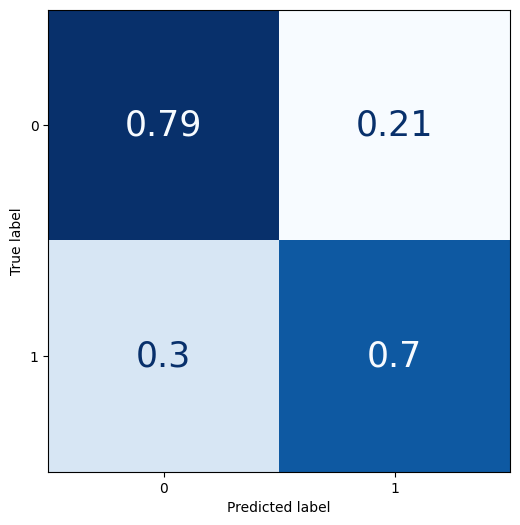

Pareizība:  0.7756822403200457
Atsaukums:  0.7756822403200457
Pricizitāte:  0.8534641367259875
F1:  0.8013541165878286


In [296]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR, display_labels=['0', '1'])
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_LR)
print('Atsaukums: ', rec_LR)
print('Pricizitāte: ', prec_LR)
print('F1: ', f1_LR)

Lēmumu koks

In [11]:
model_DT = DecisionTreeClassifier(random_state=1, criterion='entropy', ccp_alpha=0.1, class_weight='balanced')
model_DT.fit(train_data_var, train_class)
test_class_DT = model_DT.predict(test_data_var)

In [12]:
acc_DT = accuracy_score(test_class, test_class_DT)
prec_DT = precision_score(test_class, test_class_DT)
rec_DT = recall_score(test_class, test_class_DT)
f1_DT = f1_score(test_class, test_class_DT)
cm_DT = confusion_matrix(test_class, test_class_DT, normalize='true')

In [ ]:
# acc_DT = accuracy_score(test_class, test_class_DT)
# prec_DT = precision_score(test_class, test_class_DT, average='weighted')
# rec_DT = recall_score(test_class, test_class_DT, average='weighted')
# f1_DT = f1_score(test_class, test_class_DT, average='weighted')
# cm_DT = confusion_matrix(test_class, test_class_DT, normalize='true')

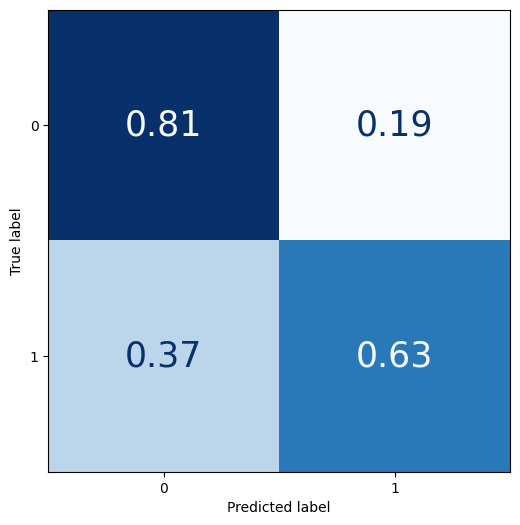

Pareizība:  0.7815402200314331
Atsaukums:  0.6325671738426676
Pricizitāte:  0.3614502404735479
F1:  0.46003531489111243


In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=['0', '1'])
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_DT)
print('Atsaukums: ', rec_DT)
print('Pricizitāte: ', prec_DT)
print('F1: ', f1_DT)

Gadījumu mežs

In [14]:
model_RF = RandomForestClassifier(max_depth=10, min_samples_split=5, class_weight='balanced', criterion='entropy', random_state=42)
model_RF.fit(train_data_var, train_class)
test_class_RF = model_RF.predict(test_data_var)

In [15]:
cm_RF = confusion_matrix(test_class, test_class_RF, normalize='true')
acc_RF = accuracy_score(test_class, test_class_RF)
rec_RF = recall_score(test_class, test_class_RF)
prec_RF = precision_score(test_class, test_class_RF)
f1_RF = f1_score(test_class, test_class_RF)

In [ ]:
# cm_RF = confusion_matrix(test_class, test_class_RF, normalize='true')
# acc_RF = accuracy_score(test_class, test_class_RF)
# rec_RF = recall_score(test_class, test_class_RF, average='weighted')
# prec_RF = precision_score(test_class, test_class_RF, average='weighted')
# f1_RF = f1_score(test_class, test_class_RF, average='weighted')

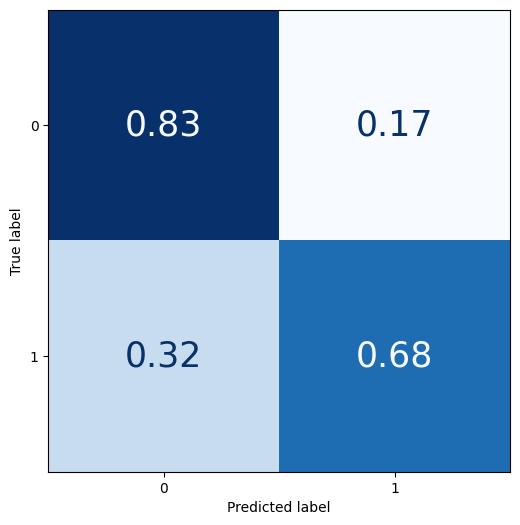

Pareizība:  0.8095918464542554
Atsaukums:  0.6762706377468436
Pricizitāte:  0.4106546097896599
F1:  0.5110078277886497


In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=['0', '1'])
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_RF)
print('Atsaukums: ', rec_RF)
print('Pricizitāte: ', prec_RF)
print('F1: ', f1_RF)

Atbalsta vektora mašīna

In [17]:
model_SVM = svm.SVC(kernel='rbf', random_state=1, class_weight='balanced')#, probability=True
model_SVM.fit(train_data_var, train_class)
test_class_SVM = model_SVM.predict(test_data_var)

In [18]:
cm_SVM = confusion_matrix(test_class, test_class_SVM, normalize='true')
acc_SVM = accuracy_score(test_class, test_class_SVM)
prec_SVM = precision_score(test_class, test_class_SVM)
rec_SVM = recall_score(test_class, test_class_SVM)
f1_SVM = f1_score(test_class, test_class_SVM)

In [ ]:
# cm_SVM = confusion_matrix(test_class, test_class_SVM, normalize='true')
# acc_SVM = accuracy_score(test_class, test_class_SVM)
# prec_SVM = precision_score(test_class, test_class_SVM, average='weighted')
# rec_SVM = recall_score(test_class, test_class_SVM, average='weighted')
# f1_SVM = f1_score(test_class, test_class_SVM, average='weighted')

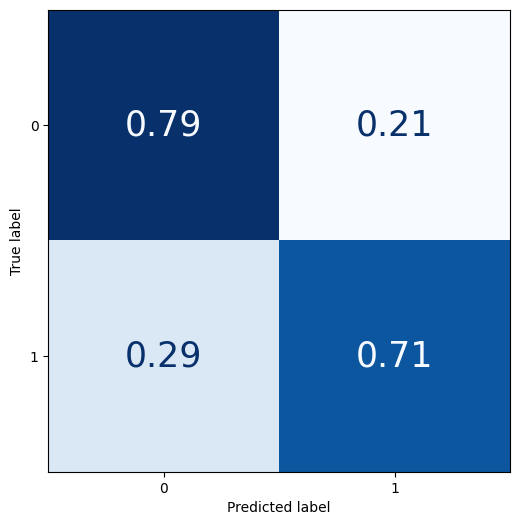

Pareizība:  0.777349145115969
Atsaukums:  0.7054062803496277
Pricizitāte:  0.36658815612382234
F1:  0.48245322705634897


In [19]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_SVM)
print('Atsaukums: ', rec_SVM)
print('Pricizitāte: ', prec_SVM)
print('F1: ', f1_SVM)

Gradienta palielināšanas

In [20]:
from sklearn.utils import compute_sample_weight

In [21]:
model_GB = GradientBoostingClassifier(learning_rate=0.3, max_depth=4, subsample=0.8, random_state=42, n_iter_no_change=10)
model_GB.fit(train_data_var, train_class, sample_weight=compute_sample_weight(class_weight='balanced', y=train_class))
test_class_GB = model_GB.predict(test_data_var)

In [22]:
cm_GB = confusion_matrix(test_class, test_class_GB, normalize='true')
acc_GB = accuracy_score(test_class, test_class_GB)
rec_GB = recall_score(test_class, test_class_GB)
prec_GB = precision_score(test_class, test_class_GB)
f1_GB = f1_score(test_class, test_class_GB)

In [ ]:
# cm_GB = confusion_matrix(test_class, test_class_GB, normalize='true')
# acc_GB = accuracy_score(test_class, test_class_GB)
# rec_GB = recall_score(test_class, test_class_GB, average='weighted')
# prec_GB = precision_score(test_class, test_class_GB, average='weighted')
# f1_GB = f1_score(test_class, test_class_GB, average='weighted')

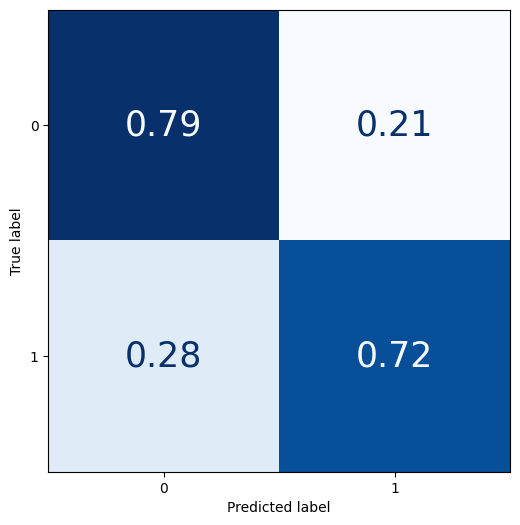

Pareizība:  0.7827308663142354
Atsaukums:  0.7238588539980576
Pricizitāte:  0.3761143818334735
F1:  0.4950188177994244


In [23]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_GB, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_GB)
print('Atsaukums: ', rec_GB)
print('Pricizitāte: ', prec_GB)
print('F1: ', f1_GB)

Ekstrēma gradieta palielināšanas

In [24]:
model_XGB = XGBClassifier(learning_rate=0.05, max_depth=4, subsample=0.8, colsample_bytree=0.5, scale_pos_weight=7, random_state=42)
model_XGB.fit(train_data_var, train_class)
test_class_XGB = model_XGB.predict(test_data_var)

In [25]:
cm_XGB = confusion_matrix(test_class, test_class_XGB, normalize='true')
acc_XGB = accuracy_score(test_class, test_class_XGB)
rec_XGB = recall_score(test_class, test_class_XGB)
prec_XGB = precision_score(test_class, test_class_XGB)
f1_XGB = f1_score(test_class, test_class_XGB)

In [ ]:
# cm_XGB = confusion_matrix(test_class, test_class_XGB, normalize='true')
# acc_XGB = accuracy_score(test_class, test_class_XGB)
# rec_XGB = recall_score(test_class, test_class_XGB, average='weighted')
# prec_XGB = precision_score(test_class, test_class_XGB, average='weighted')
# f1_XGB = f1_score(test_class, test_class_XGB, average='weighted')

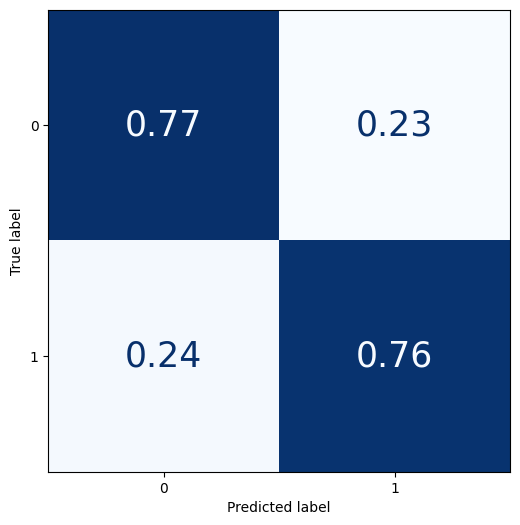

Pareizība:  0.7644901652617041
Atsaukums:  0.7578504370346391
Pricizitāte:  0.35806056898133987
F1:  0.48634050067518436


In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_XGB, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_XGB)
print('Atsaukums: ', rec_XGB)
print('Pricizitāte: ', prec_XGB)
print('F1: ', f1_XGB)

Visas pārpratuma matricas

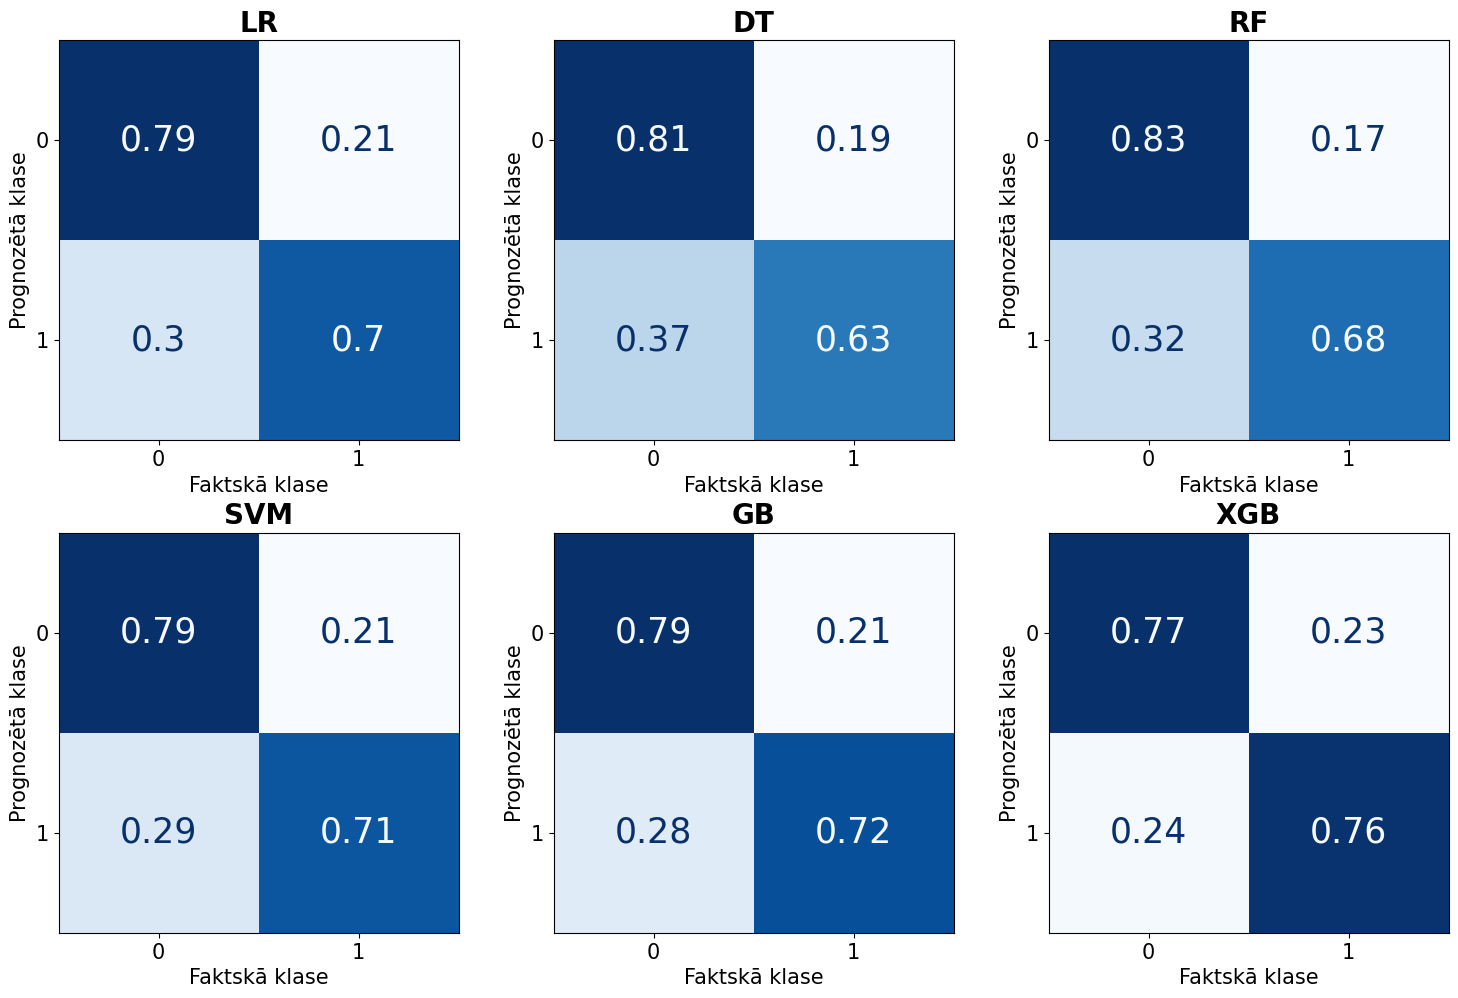

In [27]:
# models = ['Loģistiskā regresija', 'Lēmumu koks', 'Gadījumu mežs', 'Atbalsta vektora mašīna', 'Gradienta palielināšana', 'Ekstrēma gradienta palielināšana']
models = ['LR', 'DT', 'RF', 'SVM', 'GB', 'XGB']
predictions = [test_class_LR, test_class_DT, test_class_RF, test_class_SVM, test_class_GB, test_class_XGB]  
true_labels = test_class 

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
axes = axes.ravel() 
for i, ax in enumerate(axes):
    cm = confusion_matrix(true_labels, predictions[i], normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.tick_params(axis='both', labelsize=15)
    for text in disp.text_.ravel():  
        text.set_fontsize(25)
    ax.set_title(models[i], fontsize=20, fontweight='bold')
    ax.set_xlabel('Faktskā klase', fontsize=15)
    ax.set_ylabel('Prognozētā klase', fontsize=15)

plt.tight_layout()
plt.show()

Visās ROC liknes

In [28]:
def calc_roc(y_true, y_pred):
    fpr, tpr, th = metrics.roc_curve(y_true=y_true, y_score=y_pred)
    auc = metrics.roc_auc_score(y_true=y_true, y_score=y_pred)
    return fpr, tpr, th, auc

def plot_roc(y_true, y_pred, name, ax=None):
    fpr, tpr, th, auc = calc_roc(y_true=y_true, y_pred=y_pred)
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.3f)' % (name, auc))

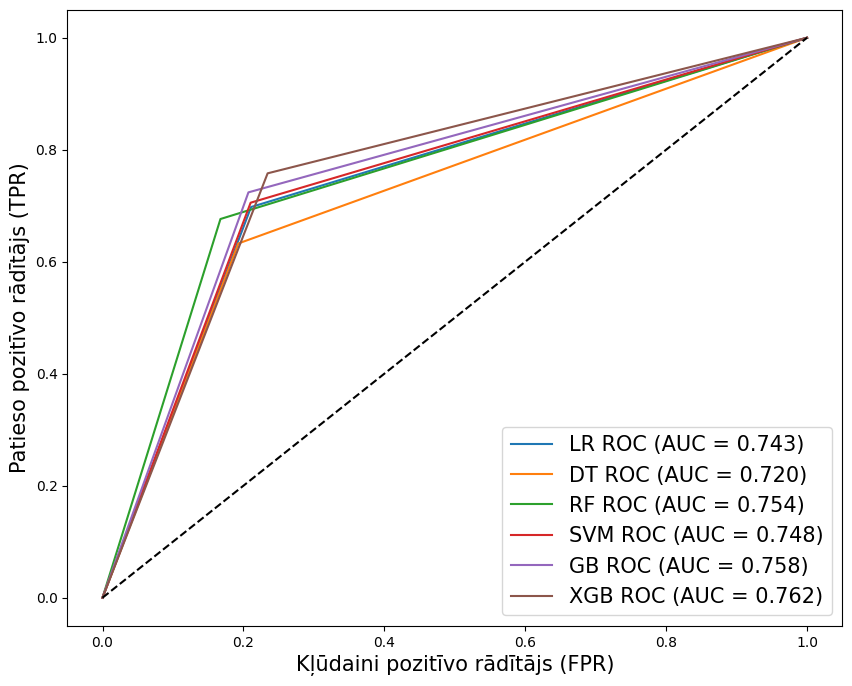

In [29]:
plt.figure(figsize=(10, 8))

plot_roc(y_true=test_class, y_pred=test_class_LR, name='LR')
plot_roc(y_true=test_class, y_pred=test_class_DT, name='DT')
plot_roc(y_true=test_class, y_pred=test_class_RF, name='RF')    
plot_roc(y_true=test_class, y_pred=test_class_SVM, name='SVM')
plot_roc(y_true=test_class, y_pred=test_class_GB, name='GB')
plot_roc(y_true=test_class, y_pred=test_class_XGB, name='XGB')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Kļūdaini pozitīvo rādītājs (FPR)', fontsize=15)
plt.ylabel('Patieso pozitīvo rādītājs (TPR)', fontsize=15)
plt.legend(loc='lower right', fontsize = 15)
plt.show()
plt.close();

Kombinēto uzraudzītas MM algoritmu modelis: https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

In [92]:
estimators = []
# estimators.append(('LR', model_LR))
# estimators.append(('DT', model_DT))
estimators.append(('RF', model_RF))
# estimators.append(('SVM', model_SVM))
estimators.append(('GB', model_GB))
estimators.append(('XGB', model_XGB))

1. metode - VotingClassifier

In [100]:
from sklearn.ensemble import VotingClassifier
model_Voting = VotingClassifier(estimators=estimators, voting='soft', verbose=1) #, weights=[0.3, 0.6, 0.4]
model_Voting.fit(train_data_var, train_class)
test_class_Voting = model_Voting.predict(test_data_var)

[Voting] ....................... (1 of 3) Processing RF, total=  10.9s
[Voting] ....................... (2 of 3) Processing GB, total=   8.4s
[Voting] ...................... (3 of 3) Processing XGB, total=   0.3s


In [101]:
acc_Voting = accuracy_score(test_class, test_class_Voting)
prec_Voting= precision_score(test_class, test_class_Voting)
rec_Voting = recall_score(test_class, test_class_Voting)
f1_Voting = f1_score(test_class, test_class_Voting)
cm_Voting = confusion_matrix(test_class, test_class_Voting, normalize='true')

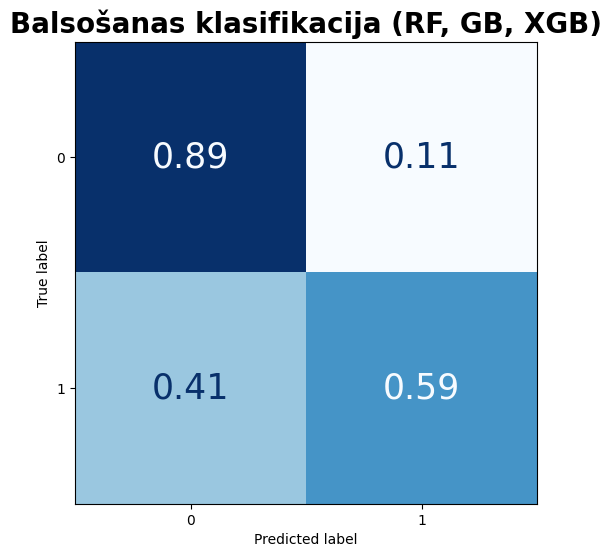

Pareizība:  0.8420726770491023
Atsaukums:  0.5878925218517319
Pricizitāte:  0.47058823529411764
F1:  0.5227403569372481


In [107]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_Voting, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.title('Balsošanas klasifikacija (RF, GB, XGB)', fontsize=20, fontweight='bold')
plt.show()

print('Pareizība: ', acc_Voting)
print('Atsaukums: ', rec_Voting)
print('Pricizitāte: ', prec_Voting)
print('F1: ', f1_Voting)

2. metode - StackedClassifier

In [103]:
from sklearn.ensemble import StackingClassifier

In [104]:
model_Stacked = StackingClassifier(estimators=estimators, cv=5)
model_Stacked.fit(train_data_var, train_class)
test_class_Stacked = model_Stacked.predict(test_data_var)

In [105]:
acc_stacked = accuracy_score(test_class, test_class_Stacked)
prec_stacked = precision_score(test_class, test_class_Stacked)
rec_stacked = recall_score(test_class, test_class_Stacked)
f1_stacked = f1_score(test_class, test_class_Stacked)
cm_stacked = confusion_matrix(test_class, test_class_Stacked, normalize='true')

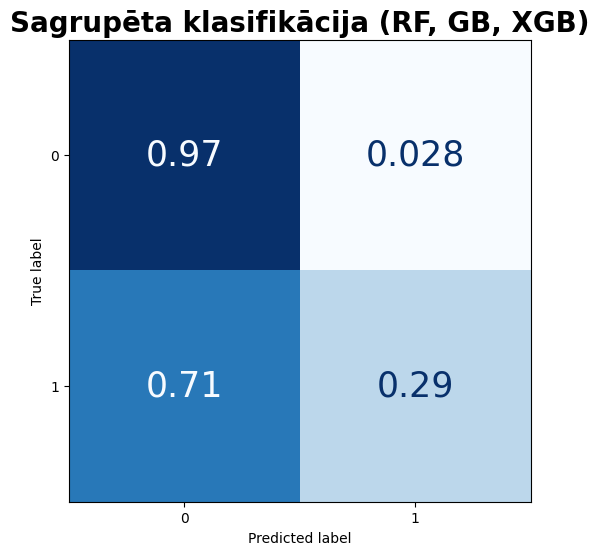

Pareizība:  0.8720769633757204
Atsaukums:  0.2923276141146002
Pricizitāte:  0.6436208125445474
F1:  0.40204808548530724


In [106]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_stacked, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.title('Sagrupēta klasifikācija (RF, GB, XGB)', fontsize=20, fontweight='bold')
plt.show()

print('Pareizība: ', acc_stacked)
print('Atsaukums: ', rec_stacked)
print('Pricizitāte: ', prec_stacked)
print('F1: ', f1_stacked)

In [ ]:
# models = ['Sagrupēts modelis ar StackingClassifier', 'Sagrupēts modelis ar VotingClassifier']
# predictions = [model_Stacked, model_Voting]  
# true_labels = test_class 

# fig, axes = plt.subplots(1, 2)  
# axes = axes.ravel() 

# for i, ax in enumerate(axes):
#     cm_grouped = confusion_matrix(true_labels, predictions[i])
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm_grouped, display_labels=['0', '1'])
#     disp.plot(ax=ax, cmap=plt.cm_grouped.Blues, colorbar=False)
#     ax.tick_params(axis='both', labelsize=15)
#     for text in disp.text_.ravel():  
#         text.set_fontsize(25)
#     ax.set_title(models[i], fontsize=20, fontweight='bold')
#     ax.set_xlabel('Faktskā klase', fontsize=15)
#     ax.set_ylabel('Prognozētā klase', fontsize=15)

# plt.tight_layout()
# plt.show()

Klasifikācija ar datu klasterēšanu

In [67]:
from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

In [68]:
data_class_clust = df_final['Target']
data_var_clust = df_final.drop(columns=['Target'])
data_var_clust_scaled = normalization.fit_transform(data_var_clust)

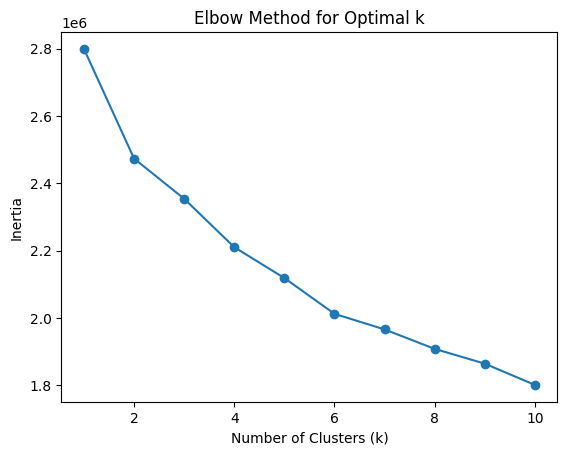

In [69]:
k_range = range(1, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_var_clust_scaled)  
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [207]:
# # Silhouette Score
# k_range = range(2, 11) 
# sil_scores = []

# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(data_var_clust)
#     sil_score = silhouette_score(data_var_clust_scaled, kmeans.labels_)
#     sil_scores.append(sil_score)

# plt.plot(k_range, sil_scores, marker='o')
# plt.title('Silhouette Score for Optimal k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.show()

In [108]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(data_var_clust_scaled)

In [109]:
data_var_clust['kmeans_clusters'] = cluster_labels

In [110]:
X_train_clust, X_test_clust, y_train_clust, y_test_clust = train_test_split(data_var_clust, data_class_clust, test_size=0.3, random_state=42)

In [111]:
X_train_clust = normalization.fit_transform(X_train_clust)
X_test_clust = normalization.fit_transform(X_test_clust)

In [112]:
model_RF_clust = RandomForestClassifier(max_depth=10, criterion='gini', class_weight='balanced', random_state=42)
model_RF_clust.fit(X_train_clust, y_train_clust)
y_class_RF = model_RF_clust.predict(X_test_clust)

In [87]:
acc_DT_clust = accuracy_score(y_test_clust, y_class_RF)
prec_DT_clust = precision_score(y_test_clust, y_class_RF)
rec_DT_clust = recall_score(y_test_clust, y_class_RF)
f1_DT_clust = f1_score(y_test_clust, y_class_RF)
cm_DT_clust = confusion_matrix(y_test_clust, y_class_RF, normalize='true')

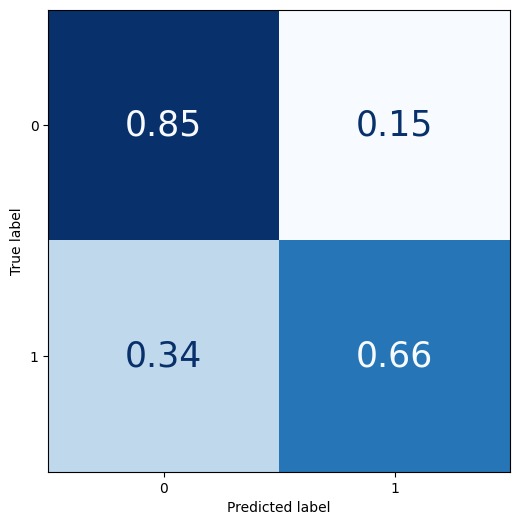

Pareizība:  0.8174977377720627
Atsaukums:  0.6581713921631093
Pricizitāte:  0.42818652849740935
F1:  0.5188347564038172


In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_DT_clust, display_labels=['0', '1'])
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_DT_clust)
print('Atsaukums: ', rec_DT_clust)
print('Pricizitāte: ', prec_DT_clust)
print('F1: ', f1_DT_clust)